# Boosting - 2 

Q1. What is Gradient Boosting Regression?

Ans. Gradient Boosting Regression is a machine learning technique used for regression tasks, where the goal is to predict a continuous numerical value, such as a price, temperature, or a score. It belongs to the ensemble learning methods, which means it combines the predictions of multiple base machine learning models to produce a more accurate and robust final prediction.

Here's a brief overview of how Gradient Boosting Regression works:

1. **Boosting:** Gradient Boosting is a boosting algorithm, which means it builds an ensemble of weak learners (typically decision trees) sequentially. Each new learner is trained to correct the errors made by the previous ones. This is in contrast to bagging techniques like Random Forests, where each learner is trained independently.

2. **Gradient Descent:** The "gradient" in Gradient Boosting refers to the gradient of a loss function. In regression, the loss function is often mean squared error (MSE), which measures the average squared difference between the predicted and actual values. Gradient Boosting tries to minimize this loss by iteratively fitting new models to the negative gradient of the loss with respect to the previous predictions. This process gradually reduces the residual error.

3. **Weak Learners:** In the context of Gradient Boosting Regression, the weak learners are typically shallow decision trees, often called "stumps" or "shallow trees." These trees are usually simple and have a limited depth, often just a single split or a few splits.

4. **Weighted Combination:** After each weak learner is trained, it is assigned a weight based on how much it contributes to reducing the loss function. The final prediction is a weighted combination of the predictions of all the weak learners. The weights ensure that more accurate models have a greater influence on the final prediction.


Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate a simple dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100)

df=pd.DataFrame({'X':X.reshape(1,100)[0], 'y':y})
df

,X,y
0,5.488135,9.811120
1,7.151894,15.204614
2,6.027634,12.520930
3,5.448832,9.361420
4,4.236548,9.961348
...,...,...
95,1.831914,4.345422
96,5.865129,10.926849
97,0.201075,-0.287399
98,8.289400,16.123268


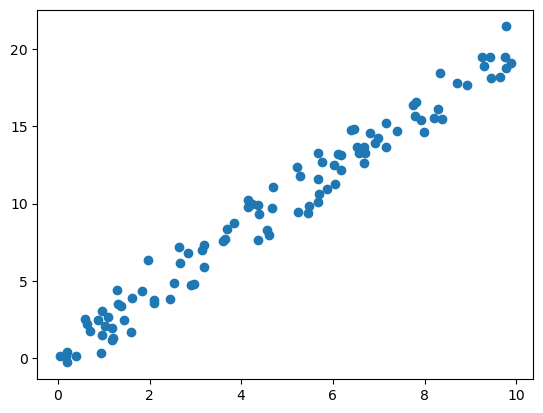

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [36]:

# Define the number of boosting iterations (weak learners)
n_estimators = 100

# Initialize the ensemble prediction with the mean of the target values
F = np.mean(y) * np.ones(len(y))

# Gradient Boosting parameters
learning_rate = 0.1

# Create the weak learners (decision trees)
weak_learners = []
for i in range(n_estimators):
    # Calculate the negative gradient (residuals)
    residuals = y - F
    
    # Fit a weak learner (decision tree) to the residuals
    weak_learner = DecisionTreeRegressor(max_depth=1)
    weak_learner.fit(X, residuals)
    
    # Update the ensemble prediction with the weighted predictions of the weak learner
    F += learning_rate * weak_learner.predict(X)
    
    # Store the weak learner in the list
    weak_learners.append(weak_learner)

# Make predictions with the final ensemble
y_pred = F

# Calculate MSE and R²
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.61
R-squared: 0.98


Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate a simple dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3]
}

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(gb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [5]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a Gradient Boosting Regressor with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params)

# Fit the best model on the training data
best_gb_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = best_gb_regressor.predict(X_val)

In [6]:
# Calculate MSE and R² on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Best Hyperparameters:", best_params)
print(f"Validation Mean Squared Error: {mse_val:.2f}")
print(f"Validation R-squared: {r2_val:.2f}")

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 50}
Validation Mean Squared Error: 1.32
Validation R-squared: 0.94


Q4. What is a weak learner in Gradient Boosting?

Ans.  In the context of Gradient Boosting Regression, the weak learners are typically shallow decision trees, often called "stumps" or "shallow trees." These trees are usually simple and have a limited depth, often just a single split or a few splits.  After each weak learner is trained, it is assigned a weight based on how much it contributes to reducing the loss function. The final prediction is a weighted combination of the predictions of all the weak learners. The weights ensure that more accurate models have a greater influence on the final prediction.


Q5. What is the intuition behind the Gradient Boosting algorithm?

Ans. Here's the intuition step by step:

1. **Initialization**: Gradient Boosting starts with an initial prediction, often a simple one like the mean of the target values. This serves as the starting point.

2. **Error Calculation**: The algorithm calculates the error, which is the difference between the current predictions and the actual target values. It uses a loss function, such as mean squared error (MSE), to quantify this error.

3. **Gradient Calculation**: The gradient of the loss function is computed with respect to the current predictions. This gradient tells us how the loss would change if we made small adjustments to our predictions. Essentially, it indicates the direction and magnitude of the error reduction we need.

4. **Update Predictions**: The next weak learner (decision tree) is trained to predict the negative gradient. This means it tries to find patterns in the data that help reduce the error in the direction indicated by the gradient.

5. **Weighted Addition**: The predictions from the new weak learner are added to the current predictions with a certain weight. The weight is determined by how much this weak learner has reduced the error. This step ensures that the overall model moves closer to the true target values.

6. **Iteration**: Steps 2-5 are repeated for a specified number of iterations (or until a stopping criterion is met). With each iteration, the model becomes better at reducing the error, as each new weak learner focuses on the remaining errors.

7. **Final Prediction**: The final prediction is the sum of the predictions from all the weak learners. Since each learner is trained to correct the errors of the previous ones, the ensemble gradually approaches an accurate prediction of the target variable.



Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Ans. The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential and adaptive manner. The key idea is to train each weak learner to correct the errors made by the previous ones. Here's how the ensemble is constructed step by step:

1. **Initialization**: The ensemble starts with an initial prediction, which is typically a simple estimate for the target variable. Common choices include the mean of the target values for regression tasks or a balanced class distribution for classification tasks.

2. **Compute Residuals**: After the initial prediction, the algorithm computes the residuals, which are the differences between the actual target values and the current predictions. These residuals represent the errors made by the current ensemble.

3. **Train a Weak Learner**: A new weak learner (usually a shallow decision tree) is trained on the residuals from the previous step. The goal of this weak learner is to capture patterns in the data that can help reduce the errors made by the current ensemble.

4. **Update Predictions**: The predictions from the newly trained weak learner are added to the current predictions with a certain weight. The weight is determined during the training process and is often calculated using techniques like gradient descent. The weight ensures that the contribution of each weak learner is proportional to its ability to reduce the error.

5. **Repeat**: Steps 2-4 are repeated for a specified number of iterations or until a stopping criterion is met. With each iteration, a new weak learner is trained to correct the errors of the current ensemble. The process continues until the ensemble's performance reaches a satisfactory level or no further improvement is observed.

The ensemble of weak learners is combined to form the final prediction. Each weak learner contributes to the prediction based on its ability to reduce the errors made by the previous ones. The final prediction is the sum (in regression) or a weighted vote (in classification) of the individual weak learner predictions.


Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

Ans. Here are the key steps and concepts involved in building the mathematical intuition of Gradient Boosting:

1. **Loss Function**: Gradient Boosting begins with defining a loss function, typically denoted as L(y, F(x)), where y represents the true target values, and F(x) represents the current ensemble's predictions. The goal is to minimize this loss function.

2. **Initial Prediction**: The ensemble starts with an initial prediction, often represented as F₀(x). This is typically a simple constant, such as the mean of the target values for regression problems or a probability distribution for classification problems.

3. **Residual Calculation**: At each iteration, the algorithm calculates the residuals (denoted as r) by subtracting the current prediction from the true target values: rᵢ = yᵢ - Fᵢ₋₁(xᵢ), where i represents the data point at index i, and Fᵢ₋₁(xᵢ) is the prediction made by the current ensemble at that point.

4. **Fit a Weak Learner**: A new weak learner (usually a decision tree) is trained to predict the residuals. This is done by fitting a model Gᵢ(x) to the residual values r.

5. **Update Ensemble**: The prediction of the ensemble is updated by adding the prediction of the newly trained weak learner, scaled by a learning rate (η): Fᵢ(x) = Fᵢ₋₁(x) + η * Gᵢ(x). This step ensures that the ensemble is moving closer to the true target values by adjusting its predictions based on the errors made so far.

6. **Iterate**: Steps 3-5 are repeated for a specified number of iterations or until a stopping criterion is met. In each iteration, a new weak learner is trained to predict the residuals, and the ensemble is updated.

7. **Final Prediction**: The final prediction is the sum of the predictions from all the weak learners: F(x) = F₀(x) + η * G₁(x) + η * G₂(x) + ... + η * Gₙ(x), where n is the total number of iterations.
